> # BACKTEST

- 데이터 명: 25 Portfolios Formed on Size and Book-to-Market (5 x 5)
    - 25 Developed Portfolios Formed on Size and Book-to-Market (5 x 5) 
- 데이터 출처: [Kennth R. French Data Library:](http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html)

In [48]:
import warnings
warnings.filterwarnings("ignore")
import glob
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 250)
pd.set_option('display.max_rows', 250)
pd.set_option('display.width', 100)
# 파일 경로 목록
file_path_list = sorted(glob.glob("./Data/*"))

## Dataset

1. Average Value Weighted Returns -- Monthly
2. Average Equal Weighted Returns -- Monthly
3. Average Value Weighted Returns -- Annual
4. Average Equal Weighted Returns -- Annual
5. Number of Firms in Portfolios
6. Average Firm Size

In [181]:
df = pd.read_csv(file_path_list[0], skiprows=20)
df = df.rename(columns={" ": "Date"})
dfs = []
start_idx = -1
for _, idx in enumerate(df.loc[df['Date'].str.len() < 2].index):
    print(_+1)
    part = df.iloc[start_idx+1:idx-1]
    part.index=range(len(part))
    part[df.columns[1:]] = part[df.columns[1:]].apply(pd.to_numeric)
    try:
        part[df.columns[0]] = pd.to_datetime(part[df.columns[0]].str.strip(), format="%Y%m")
    except:
        part[df.columns[0]] = pd.to_datetime(part[df.columns[0]].str.strip(), format="%Y")
    dfs.append(part)
    start_idx = idx
part = df.iloc[idx+1:]
part.index=range(len(part))
dfs.append(part)
df1, df2, df3, df4, df5, df6 = map(lambda x: x[0], zip(dfs))

1
2
3
4
5


## 1. Average Value Weighted Returns -- Monthly

In [198]:
df1.describe()

,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,ME2 BM5,ME3 BM1,ME3 BM2,ME3 BM3,ME3 BM4,ME3 BM5,ME4 BM1,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.00000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000
mean,0.339631,0.627995,0.855989,0.866491,1.120317,0.451055,0.683377,0.706201,0.798654,0.870026,0.568971,0.636253,0.741425,0.77628,0.877731,0.727071,0.709208,0.724908,0.778470,0.817018,0.772137,0.751636,0.722850,0.720079,0.748391
std,5.779457,5.325242,5.076486,4.520855,4.344747,5.753663,5.150917,4.629691,4.418594,4.588360,5.641333,5.090009,4.736505,4.55771,4.755254,5.451466,4.582265,4.595443,4.550387,4.862927,4.548908,4.276967,4.347591,4.411165,5.330845
min,-24.220000,-25.620000,-24.450000,-21.080000,-19.650000,-24.600000,-24.700000,-20.610000,-21.390000,-24.080000,-24.330000,-24.710000,-22.580000,-20.63000,-22.770000,-23.480000,-21.670000,-20.410000,-22.250000,-24.480000,-18.310000,-15.060000,-18.840000,-18.390000,-26.230000
25%,-2.490000,-2.020000,-1.685000,-1.420000,-1.175000,-2.500000,-1.930000,-1.695000,-1.415000,-1.280000,-2.120000,-2.000000,-1.600000,-1.49000,-1.330000,-2.065000,-1.585000,-1.690000,-1.450000,-1.585000,-1.455000,-1.660000,-1.655000,-1.370000,-1.860000
50%,0.900000,1.120000,1.130000,1.280000,1.250000,0.840000,1.280000,1.050000,1.150000,1.020000,0.980000,1.150000,1.190000,1.27000,1.000000,1.190000,1.230000,1.160000,0.960000,1.350000,1.150000,1.240000,1.150000,1.100000,1.280000
75%,3.405000,3.705000,3.465000,3.590000,3.680000,3.950000,3.795000,3.325000,3.445000,3.560000,3.710000,3.380000,3.435000,3.36500,3.490000,3.760000,3.435000,3.280000,3.250000,3.470000,3.490000,3.375000,3.420000,3.255000,3.720000
max,23.460000,21.640000,21.890000,15.060000,14.440000,21.920000,15.620000,15.150000,15.130000,15.840000,16.650000,15.300000,15.860000,16.12000,17.780000,21.270000,12.760000,14.610000,16.000000,17.990000,12.750000,16.040000,12.050000,15.240000,20.180000


In [201]:
df1.describe().mean()

SMALL LoBM    48.271761
ME1 BM2       47.972280
ME1 BM3       48.160309
ME1 BM4       47.727168
SMALL HiBM    47.876258
ME2 BM1       48.101840
ME2 BM2       47.362412
ME2 BM3       47.694486
ME2 BM4       47.642156
ME2 BM5       47.439798
ME3 BM1       47.512538
ME3 BM2       47.230783
ME3 BM3       47.597866
ME3 BM4       47.871124
ME3 BM5       47.850373
ME4 BM1       48.231692
ME4 BM2       47.307684
ME4 BM3       47.658794
ME4 BM4       47.604857
ME4 BM5       47.678118
BIG LoBM      47.743256
ME5 BM2       48.495450
ME5 BM3       47.524430
ME5 BM4       47.995781
BIG HiBM      47.771154
dtype: float64

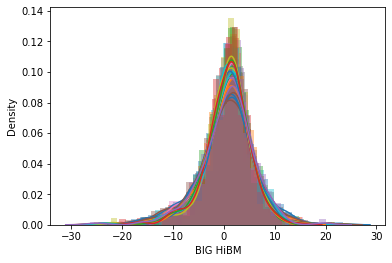

In [196]:
import matplotlib.pyplot as plt
import seaborn as sns
for col in df1.columns[1:]:
#     plt.figure()
    sns.distplot(df1[col])